# OpenCV-Python 기초사용법

## 영상속성

In [2]:
# check opencv version: https://pypi.org

! pip install opencv-python
# ! pip install opencv-python==ver  # ver에 버전 기입해서 다른 버전 설치 가능

import sys
import cv2

print('Hello, OpenCV', cv2.__version__)

Hello, OpenCV 4.5.2


In [3]:
import sys
import cv2
import numpy as np

In [2]:
# cv2.imread(filename[, flags]) -> retval

# retval
    # numpy.nbarray : retval.ndim/shape/size/dtype
    # dtype : uint8
    # shape : gray영상의 경우 (h,w) 또는 color (h,w, 3) 
    # gray영상 : cv2.CV_8UC1 -> numpy.uint8
    # color영상 : cv2.CV_8UC3 -> numpy.uint8
    
    
img1 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)

print(type(img1))  # numpy.ndarray만 사용 가능
print(img1.shape)  # color는 3D이므로 (row, column, 3)
print(img1.ndim)  # dimension : 3D

<class 'numpy.ndarray'>
(480, 640, 3)
3


In [3]:
# 영상 불러오기
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)  # gray
img2 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)  # color

if img1 is None or img2 is None:
    print('Image load failed!')
    sys.exit()


# 영상의 속성 참조
print('type(img1):', type(img1))
print('img1.shape:', img1.shape)
print('img2.shape:', img2.shape)  # color라서 3
print('img1.dtype:', img1.dtype)
print('img1.dtype:', img2.dtype)

print('img1.shape length:', len(img1.shape))  # (480, 640)이므로
print('img2.shape length:', len(img2.shape))  # (480, 640, 3)

type(img1): <class 'numpy.ndarray'>
img1.shape: (480, 640)
img2.shape: (480, 640, 3)
img1.dtype: uint8
img1.dtype: uint8
img1.shape length: 2
img2.shape length: 3


## 영상의 크기 참조

In [4]:
# row by col
h, w = img1.shape  # h=480, w=640
print('img1 size: {} x {}'.format(w, h))

h, w = img2.shape[:2]  # (480, 640, 3) 중 앞 2개만
print('img2 size: {} x {}'.format(w, h))

# matrix 도메인과 pixel 도메인은 가로, 세로를 반대로 쓴다.
# matrix 도메인은 가로가 먼저, pixel(모니터)은 세로가 먼저 온다.

img1 size: 640 x 480
img2 size: 640 x 480


## 영상의 픽셀값 참조

In [5]:
x = 20
y = 30

p1 =img1[y,x]  # 도메인이 반대이므로
print(p1)  # gray

p2 = img2[y, x]
print(p2)  # color이므로 BGR 순서대로 [255, 254, 246]

# 좌표값 입력해서 부분적으로 색깔 바꿔 주기
# img1[10:20, 10:20] = 0  # 10-19까지 0(검은색)
# img2[10:20, 10:20] = (0, 0, 255)  # BGR 셋 다 넣어 줘야 한다. 이 경우 빨간색

cv2.imshow('image', img1)
cv2.imshow('image2',img2)

cv2.waitKey()
cv2.destroyAllWindows()

252
[255 254 246]


## 영상생성

In [6]:
'''
numpy.empty(shape, dtype)
numpy.zeros(shape, dtype)
numpy.ones(shape, dtype)
numpy.full(shape, fill_value, dtype)
'''

'\nnumpy.empty(shape, dtype)\nnumpy.zeros(shape, dtype)\nnumpy.ones(shape, dtype)\nnumpy.full(shape, fill_value, dtype)\n'

In [7]:
import numpy as np
import cv2

# 새 영상 생성하기
img1 = np.empty((240, 320), dtype=np.uint8)       # grayscale image (가로, 세로)
img2 = np.zeros((240, 320, 3), dtype=np.uint8)    # color image
img3 = np.ones((240, 320), dtype=np.uint8) * 255  # dark gray
img4 = np.full((240, 320, 3), (0, 255, 255), dtype=np.uint8)
# 원하는 상수 채우기: (0, 255, 255) = yellow

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey()
cv2.destroyAllWindows()

- np.empty()는 (값의 초기화를 수행하지 않고) 주어진 형태와 타입을 갖는 새로운 어레이를 반환한다. 초기화를 수행하지 않으므로 쓰레기 값이 들어가 있다.

## 새영상 생성

In [8]:
# 영상 복사
# img1 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)
img1 = cv2.imread('HappyFish.jpg')  # 기본적으로 color

if img1 is None:
    print("image load failed")
    sys.exit()

img2 = img1  # 메모리의 같은 주소를 참조하므로 img1을 바꾸면 img2도 바뀐다.
img3 = img1.copy()  # matrix를 copy

img1[:,:] = (0, 255, 255)  # img1 전체를 노란색(0, 255, 255)으로 변경
# img1, img2는 전체 노란색으로 나오고 img3만 HappyFish가 나온다.

print(img1.shape)
print(img1.dtype)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)

cv2.waitKey()
cv2.destroyAllWindows()

(194, 259, 3)
uint8


## 부분 영상 추출

In [9]:
img1 = cv2.imread('HappyFish.jpg')

img2 = img1[40:120, 30:150]  # numpy.ndarray의 슬라이싱
img3 = img1[40:120, 30:150].copy()

img2.fill(0)  # 0 = 검정색

cv2.imshow('img1', img1)  # 얼굴 잘린 HappyFish
cv2.imshow('img2', img2)  # 검은 화면
cv2.imshow('img3', img3)  # HappyFish 얼굴


cv2.waitKey()
cv2.destroyAllWindows()

## 마스크 연산과 ROI

In [4]:
# 마스크 영상을 이용한 영상 합성
src = cv2.imread('airplane.bmp', cv2.IMREAD_COLOR)         # 비행기 그림(source)
mask = cv2.imread('mask_plane.bmp', cv2.IMREAD_GRAYSCALE)  # 비행기 윤곽(mask)
dst = cv2.imread('field.bmp', cv2.IMREAD_COLOR)            # 합성할 들판 사진(destination)

if src is None or mask is None or dst is None:
    print('Image load failed!')
    sys.exit()
    

# 영상의 포맷과 형식이 같아야 함
# cv2.copyTo(src, mask, dst)   # dst 윈도우에 field를 배경으로 한 airplane이 나옴
# dst = cv2.copyTo(src, mask)  # dst 윈도우에 mask의 검은 바탕을 배경으로 한 airplane이 나옴

# Using numpy
dst[mask > 0] = src[mask > 0]

# 0보다 큰 것 = 1(True)
# mask는 검은 부분이 0인 matrix
# src에서 mask의 값이 있는 좌표들의 값을 추출해서 dst의 해당 좌표값을 대체

# np.column_stack(np.where(src[mask > 0]))
# print(src[mask > 0])  # src에서 mask의 흰색 부분만 출력

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

- cv2.copyTo() : copyTo(src, mask[, dst]) -> dst

![copyto](https://user-images.githubusercontent.com/61646760/123933765-a71ab300-d9cd-11eb-9693-be29ff40062a.png)

## 알파 채널을 마스크 영상으로 이용

In [5]:
# 고양이 사진에 OpenCV 로고 넣기
src = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)
logo = cv2.imread('opencv-logo-white.png', cv2.IMREAD_UNCHANGED)  # 원본 이미지

print(logo.shape)  # 채널이 4인 이유는 BGR + alpha channel(transparent)

if src is None or logo is None:
    print('Image load failed!')
    sys.exit()

mask = logo[:, :, 3]    # mask는 알파 채널로 만든 마스크 영상 (zero-based라 3이면 마지막)
logo = logo[:, :, :-1]  # logo는 b, g, r 3채널로 구성된 컬러 영상 (-1: 마지막 것만 제외)
h, w = mask.shape[:2]   # 인덱스 0, 1을 각각 h, w에 할당 (즉, 그림의 세로, 가로 사이즈)
# print(mask.shape)     # (222, 180)
crop = src[10:10+h, 10:10+w]      # logo, mask와 같은 크기의 부분 영상 추출
# crop = src[100:10+h, 100:10+w]  # 위치가 어떻게 바뀌는지 확인용

cv2.copyTo(logo, mask, crop)
# crop[mask > 0] = logo[mask > 0]  # boolean index 사용해서 합성

cv2.imshow('src', src)
cv2.imshow('logo', logo)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

(222, 180, 4)


![copyto2](https://user-images.githubusercontent.com/61646760/123933777-a8e47680-d9cd-11eb-9352-3234b4e06cfc.png)

## OpenCV 그리기 함수

In [ ]:
# cv2.line(img, pt1, pt2, color, thickness = None, lineType = None) -> img
# flags
    # img:그림을 그릴 영상
    # pt1, pt2: 직선의 시작점, 끝점
    # color: 직선의 칼라 (B,G,R)의 튜플
    # thinkness: 선두께
    # lineType: cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA
    
# cv2.rectangle(img, pt1, pt2, color, thickness = None, lineType = None) -> img
# cv2.rectangle(img, rect, color, thickness = None, lineType = None) -> img
    # rect: 사각형의 위치 정보 (x, y, w, h)
        
# cv2.circle(img, center, radius, color, thickness = None, lineType = None) -> img
    # center: 원의 중심좌표 (x, y)
    # radius : 원의 반지름
    
# cv2.polylines(img, pts, isClosed, color, thickness = None, lineType = None) -> img
    # center: 다각형 점들의 array
    # isClosed : True for 폐곡선

In [ ]:
import numpy as np
import cv2

img = np.full((400, 400, 3), 255, np.uint8)  # 400x400x3을 255로 채우기(= 흰색)

# x, y 좌표 순서
# 선 긋기
cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 5)  # BGR이니 빨간색, 두께 5
cv2.line(img, (50, 60), (150, 160), (0, 0, 128))    # 50, 60에서 시작해서 150, 160까지 선

# 사각형 그리기
cv2.rectangle(img, (50, 200, 150, 100), (0, 255, 0), 2)     # rect를 준 것
cv2.rectangle(img, (70, 220), (180, 280), (0, 128, 0), -1)  # pt1, pt2를 준 것, -1 내부 채우기

# 원 그리기 (원 둘레가 살짝 깨짐)
# cv2.circle(img, (300, 100), 30, (255, 255, 0), -1)  # -1 내부 채우기
# cv2.circle(img, (300, 100), 60, (255, 0, 0), 3)

# LINE_AA를 쓰면 원이 부드럽게 그려진다.
cv2.circle(img, (300, 100), 30, (255, 255, 0), -1, cv2.LINE_AA)  # -1 내부 채우기
cv2.circle(img, (300, 100), 60, (255, 0, 0), 3, cv2.LINE_AA)

# 다각형 그리기
pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])  # array를 list로 만듦
cv2.polylines(img, [pts], True, (255, 0, 255), 2)                 # pts: 다각형 꼭지점 좌표

# 텍스트 그리기
text = 'Hello? OpenCV ' + cv2.__version__  # 버전 : 4.5.2
cv2.putText(img, text, (50, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
            (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

![line](https://user-images.githubusercontent.com/61646760/123933792-ab46d080-d9cd-11eb-89ce-fa5aae274e15.png)

## 카메라와 동영상 처리하기 

In [ ]:
# cv2.VideoCapture(index/filename, apiPreference=None) -> retval
# index: camera_id or filename
# apiPreference=None


# cv2.VideoCapture.open(index/filename, apiPreference=None) -> retval
# retval: True or False

# cv2.VideoCapture.read(image=None) -> retval, image
# retval : True or False

# cv2.VideoCapture.get() -> retval

# cv2.Canny(image, threshold1, threshold2)
# image:입력영상
# threshold1 = low value, threshold2 =  high value

In [8]:
# 카메라 열기
cap = cv2.VideoCapture(0)  # 0으로 하면 디폴트 카메라 열림 (안 되면 변경)

if not cap.isOpened():  # True or False
    print("Camera open failed!")
    sys.exit()


# 카메라 프레임 크기 출력
print('Frame width:', int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))    # cap의 화면 width
print('Frame height:', int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))  # cap의 화면 height


cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)   # 영상 넓이 설정. 없으면 자동 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)  # 영상 높이 설정. 없으면 자동 설정


# 카메라 프레임 처리
while True:
    ret, frame = cap.read()  # 영상을 read하면 2개 parameters가 들어옴 (ret는 TF 값)

    if not ret:
        break

    edge = cv2.Canny(frame, 50, 150)  # Canny()는 윤곽을 받음
    inversed = ~frame                 # 반전 (255 - 기존 pixel 값)
    
    cv2.imshow('frame', frame)        # 일반 영상
    cv2.imshow('frame1', edge)        # 윤곽 딴 영상
    cv2.imshow('inversed', inversed)  # 반전 영상
    # 따라서 총 3개의 영상이 뜬다.

    if cv2.waitKey(10) == 27:  # ESC키로 종료
        break

cap.release()            # 동영상 정보를 받지 않음
cv2.destroyAllWindows()  # 윈도우 닫기

Frame width: 640
Frame height: 480


![videocapture](https://user-images.githubusercontent.com/61646760/123933803-ada92a80-d9cd-11eb-89ac-91e38e6d7e91.png)

## 카메라 동영상 저장하기

In [1]:
# cv2.VideoWriter(filename, fourcc, fps, framesize, isColor=None) -> retval
# filename: 저장할 이름
# fourcc: cv2.VideoWriter_fourcc(*'DIVX') 를 사용
# fps: 초당 프레임 수 e.g. 30
# frameSize: 프레임 크기 e.g., [640, 480])
# isColor: Color 영상

In [17]:
# import sys
# import cv2


cap = cv2.VideoCapture(2)

if not cap.isOpened():
    print("Camera open failed!")
    sys.exit()

# cap.get(cv2.CAP_PROP_FRAME_WIDTH) -> float type 반환
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # 정수형으로 바꾸기 위해 round
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # width와 height 가져오기

fps = cap.get(cv2.CAP_PROP_FPS)  # frame/second

# fourcc = cv2.VideoWriter_fourcc(*'MPEG')  # MPEG로 쓰기 (fourcc: four character code)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')    # *'DIVX' == 'D', 'I', 'V', 'X'
delay = round(1000 / fps)

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))  # output.avi로 저장

if not out.isOpened():
    print('File open failed!')
    cap.release()
    sys.exit()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # inversed = ~frame
    edge = cv2.Canny(frame, 50, 150)
    edge_color = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)  # 카메라가 유색이므로 color로 변경

    out.write(frame)        # 소리는 capture가 안 됨 (프레임 받아 저장)
    # out.write(inversed)
    out.write(edge_color)

    cv2.imshow('frame', frame)
    # cv2.imshow('inversed', inversed)
    cv2.imshow('edge', edge)

    if cv2.waitKey(delay) == 27:  # delay만큼 wait
        break

cap.release()
out.release()

cv2.destroyAllWindows()

## 키보드 이벤트 처리하기

In [12]:
# import sys
# import numpy as np
# import cv2


img = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)

if img is None:
    print('Image load failed!')
    sys.exit()

cv2.namedWindow('image')
cv2.imshow('image', img)

# cv2.waitKeyEx()

while True:
    keycode = cv2.waitKey()
    if keycode == ord('i'):      #  'i' 키를 누르면
        img = ~img               # 반전 (255 - 기존 pixel 값)
        cv2.imshow('image', img)
    elif keycode == 27:         # ESC면 종료
        break

cv2.destroyAllWindows()

- i 버튼을 누른 이미지
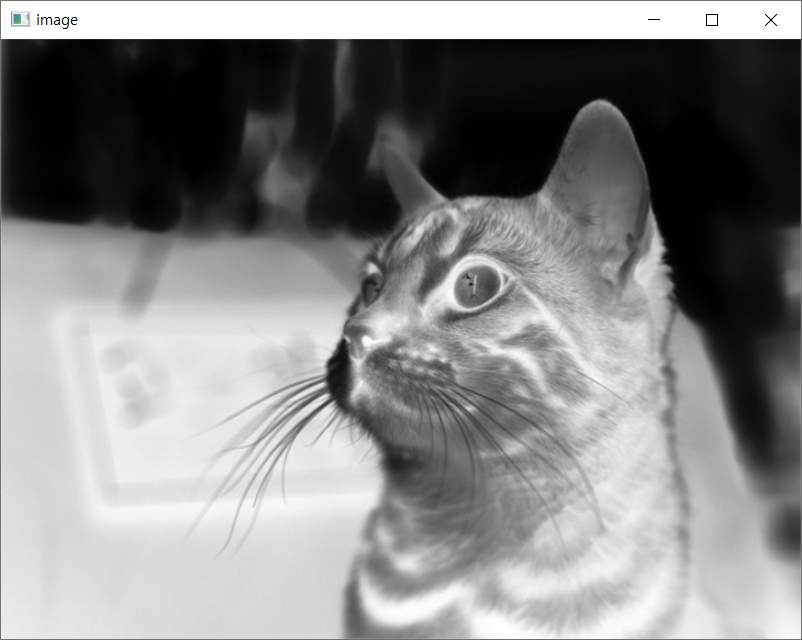

## 마우스 이벤트 처리하기

In [ ]:
# cv2.setMouseCallback(windowName, onMouse, param = None) -> None
    # windowName: 마우스이벤트를 수행할 창 이름
    # onMouse: 마우스 이벤트 콜백 함수
    # param: 콜백함수에 전달할 데이터

# onMouse(event, x, y, flags, param) -> None
# event: 마우스 이벤트 종류 e.g., cv2.EVENT_LBUTTONDOWN
# x, y : 창을 기준으로 이벤트 발생좌표
# flags: 이벤트시 발생 상태 e.g., "ctrl"
# param: cv2.setMouseCallback()함수에서 설정한 데이터

In [16]:
# import sys
# import numpy as np
# import cv2


oldx = oldy = -1  # 초기화 (0이어도 상관 없음)

def on_mouse(event, x, y, flags, param):  # 콜백 함수 정의
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:              # 마우스 좌버튼 누를 때
        oldx, oldy = x, y
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))  # x, y 좌표 출력

    elif event == cv2.EVENT_LBUTTONUP:             # 마우스 좌버튼 뗄 때
        print('EVENT_LBUTTONUP: %d, %d' % (x, y))  # x, y좌료 출력

    elif event == cv2.EVENT_MOUSEMOVE:            # 마우스가 움직일 때
        if flags & cv2.EVENT_FLAG_LBUTTON:        # 마우스 좌버튼을 누르고 flag가 T면
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 4, cv2.LINE_AA)  # img에 선 그리기
            cv2.imshow('image', img)
            oldx, oldy = x, y


img = np.ones((480, 640, 3), dtype=np.uint8) * 255  # 480*640*3을 1로 채우기

cv2.namedWindow('image')
cv2.setMouseCallback('image', on_mouse, img)  # 항상 창을 띄우고 콜백 함수 호출

cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

EVENT_LBUTTONDOWN: 87, 155
EVENT_LBUTTONUP: 424, 118


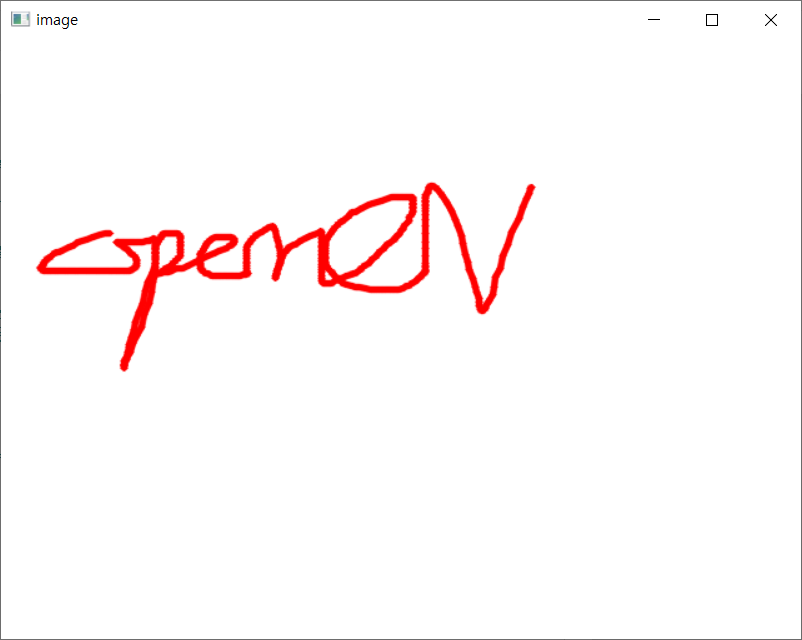

## 트랙바 사용하기

In [ ]:
# createTrackbar(trackbarName, windowName, value, count, onChange) -> None
# trackbarName: 트랙바 이름
# windowName : 트랙바를 생성할 창 이름
# value : 트랙바 위치 초기값
# count : 트랙바 최댓값, 최솟값은 0
# onChange :callback 함수 e.g., onChange(pos) 위치를 정수형태로 전달

In [38]:
# import numpy as np
# import cv2


def on_level_change(pos):
    print(pos)
    value = pos * 16
#     if value >= 255:
#         value = 255
#     value = np.clip(value,0,255)

    img[:] = value
    cv2.imshow('image', img)


img = np.zeros((480, 640), np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('level', 'image', 0, 16, on_level_change) # 창이 생성된 후 호출

cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()